If you are a LinkedIn user, have you ever wondered about the segments of people in your network? 

As a user on LinkedIn I was curious about the statistics of people in my network which led me to try to anlyse my LinkedIn network using python.

# Data

It didn’t take me too much effort to get the data because you can directly download it from LinkedIn. Here is how you can do it : https://www.linkedin.com/help/linkedin/answer/50191/downloading-your-account-data?lang=en

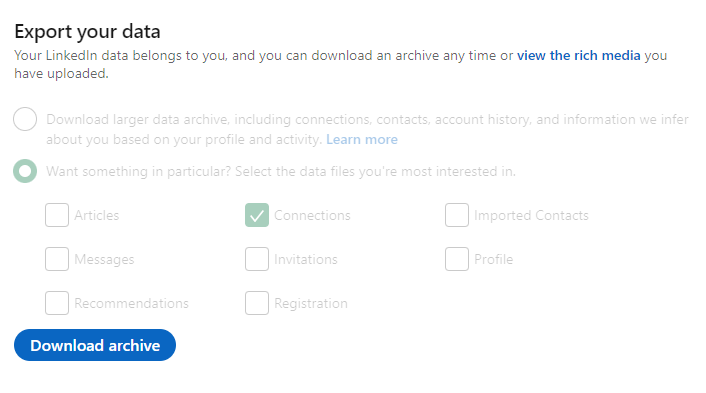

Specifically, I imported the connections data.

I will now import and check the data :

In [ ]:
pip install -U kaleido

In [ ]:
pip install plotly==5.3.1 

In [1]:
# import libraries
import pandas as pd 
import numpy as np 
import plotly.express as px

In [ ]:
# import and view the data
connections_df = pd.read_csv('sample_data/Connections.csv')
connections_df.head(10)

In [3]:
connections_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   First Name     703 non-null    object
 1   Last Name      703 non-null    object
 2   Email Address  22 non-null     object
 3   Company        675 non-null    object
 4   Position       676 non-null    object
 5   Connected On   708 non-null    object
dtypes: object(6)
memory usage: 33.3+ KB


Connected On indicates the date I connect to that person, I will convert that column into a date-time and visualize it with Plotly

In [4]:
connections_df ["Connected On"] = pd.to_datetime(connections_df ["Connected On"])
connections_df ["Connected On"]

0     2022-09-29
1     2022-09-15
2     2022-09-15
3     2022-09-11
4     2022-09-09
         ...    
703   2020-07-28
704   2020-07-28
705   2020-07-28
706   2020-07-28
707   2020-07-28
Name: Connected On, Length: 708, dtype: datetime64[ns]

# Visualisations

## Number of Connecions 

In [6]:
connections_line = px.line(connections_df.groupby(by='Connected On').count().reset_index(), 
                           x="Connected On", 
                           y="First Name", 
                           labels={'First Name': 'Number'},
                           title='My Connections')
#connections_line.show()
#connections_line.show("png")
connections_line.to_image(format="png")

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\xbc\x00\x00\x01\xf4\x08\x06\x00\x00\x00\xdfY\xfe\xdf\x00\x00 \x00IDATx^\xec\x9d\x0b\x98U\xe3\xfe\xc7\xbf\xb3\xf7L\xd3\xb8E:$\xb7D\x84\\\xca%\xfa\xbb$\x1c"\x92\x93\x8e\x8a\x8atP\x88b\xe8~\xa1bt\xbf\x89\xeer)\x8a"\x92P\x9cN\x1dD\x1cEC\x94"\xb9V\xa4\xdb\\\xf6\xffy\xd7\xb4\xb6\xdd4S{\xe6]\xfb\xf7\xbe\xef\xde\xdf\xf5<\xff\xffs4\xfb}\x7f\xbf\xf5\xf9\xae\xbd\xf7g\xaf\xfd\xae\xb5\xd3"\x91H\x04\xdcH\x80\x04H\x80\x04H\x80\x04H\x80\x04H I\t\xa4Qx\x934Y\xee\x16\t\x90\x00\t\x90\x00\t\x90\x00\t\x90\x80G\x80\xc2\xcb\x03\x81\x04H\x80\x04H\x80\x04H\x80\x04H \xa9\tPx\x93:^\xee\x1c\t\x90\x00\t\x90\x00\t\x90\x00\t\x90\x00\x85\x97\xc7\x00\t\x90\x00\t\x90\x00\t\x90\x00\t\x90@R\x13\xa0\xf0&u\xbc\xdc9\x12 \x01\x12 \x01\x12 \x01\x12 \x01\n/\x8f\x01\x12 \x01\x12 \x01\x12 \x01\x12 \x81\xa4&@\xe1M\xeax\xb9s$@\x02$@\x02$@\x02$@\x02\x14^\x1e\x03$@\x02$@\x02$@\x02$@\x02IM\x80\xc2\x9b\xd4\xf1r\xe7H\x80\x04H\x80\x04H\x80\x04H\x80\x04(\xbc<\x06H\x80\x04H\x80\x04H\x80\x0

## Which organizations do the people in my network work at? 

In [7]:
company_groupby = connections_df.groupby(by='Company').count().reset_index().sort_values(by='First Name', ascending=False).reset_index(drop=True)
company_groupby

,Company,First Name,Last Name,Email Address,Position,Connected On
0,Ecole des sciences de l'information [ESI],13,13,0,13,13
1,Capgemini,10,10,1,10,10
2,Confidential,9,9,0,9,9
3,Orange Business Services,8,8,0,8,8
4,Atos,6,6,1,6,6
...,...,...,...,...,...,...
492,Europ Assistance,1,1,0,1,1
493,Esnad Business,1,1,0,1,1
494,Eslsca Paris - Campus Rabat,1,1,0,1,1
495,Entreprise,1,1,0,1,1


In [8]:
# Bar Graph
fig = px.bar(company_groupby[:140],
      x='Company',
      y='First Name',
      labels={'First Name': 'Number'})

#fig
fig.to_image(format="png")

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\xbc\x00\x00\x01\xf4\x08\x06\x00\x00\x00\xdfY\xfe\xdf\x00\x00 \x00IDATx^\xec\x9d\t\xb8\x8d\xd5\x17\xc6\xd7\xb9\x862\xcfe(\xd2D\xa1\x90)sf\x929C\xca\x10\xca\x982\x152\x872T\x14\x112\xa5H*"\x19\xa3\x14\xcaXQ\x9aKi@\xe6\xd9\xbd\xe7\xff\xbc\x9bs\xff\xe7\x1e\xe7\x9b\xce\xba\xa7{]\xef\xf7<=\xe1|{\xfa\xed}\xbe\xf3~k\xaf\xbd\x96\xcf\xef\xf7\xfb\x85\x17\t\x90\x00\t\x90\x00\t\x90\x00\t\x90\x00\t\xa4P\x02>\n\xde\x14:\xb3\x1c\x16\t\x90\x00\t\x90\x00\t\x90\x00\t\x90\x80!@\xc1\xcb\x85@\x02$@\x02$@\x02$@\x02$\x90\xa2\tP\xf0\xa6\xe8\xe9\xe5\xe0H\x80\x04H\x80\x04H\x80\x04H\x80\x04(x\xb9\x06H\x80\x04H\x80\x04H\x80\x04H\x80\x04R4\x01\n\xde\x14=\xbd\x1c\x1c\t\x90\x00\t\x90\x00\t\x90\x00\t\x90\x00\x05/\xd7\x00\t\x90\x00\t\x90\x00\t\x90\x00\t\x90@\x8a&@\xc1\x9b\xa2\xa7\x97\x83#\x01\x12 \x01\x12 \x01\x12 \x01\x12\xa0\xe0\xe5\x1a \x01\x12 \x01\x12 \x01\x12 \x01\x12H\xd1\x04(xS\xf4\xf4rp$@\x02$@\x02$@\x02$@\x02\x14\xbc\\\x03$@\x02$@\x02$@\x02$@\x02)\x9a\x00\x05o

In [9]:
# Bar Graph | Zoom
company_groupby = connections_df.groupby(by='Company').count().reset_index().sort_values(by='First Name', ascending=False).reset_index(drop=True)

fig2 = px.bar(company_groupby[:15],
      x='Company',
      y='First Name',
      labels={'First Name': 'Number'})

#fig2
fig2.to_image(format="png")

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\xbc\x00\x00\x01\xf4\x08\x06\x00\x00\x00\xdfY\xfe\xdf\x00\x00 \x00IDATx^\xec\x9d\x07\x94\x14\xc5\x16\x86\xff]\x82\x92\xa3\x88\x88\xa8\x88JT\xa2\xe4 9I\x8e\x92\x05$\x83d\xc99-I2HF\t\x12\x14\x90\x9c$\x8a 9\t""\x02\x8a\xe4\x9ca\xdf\xb9\xe5\xdbuw\x99\xdd\x99\xa1g\xaakf\xff>\xe7\x9d\xa7nw\xd5\xad\xafn\xf7\xfc]}\xeb\xde\x80\xe0\xe0\xe0`\xf0 \x01\x12 \x01\x12 \x01\x12 \x01\x12 \x01?%\x10@\xc1\xeb\xa73\xcba\x91\x00\t\x90\x00\t\x90\x00\t\x90\x00\t(\x02\x14\xbct\x04\x12 \x01\x12 \x01\x12 \x01\x12 \x01\xbf&@\xc1\xeb\xd7\xd3\xcb\xc1\x91\x00\t\x90\x00\t\x90\x00\t\x90\x00\tP\xf0\xd2\x07H\x80\x04H\x80\x04H\x80\x04H\x80\x04\xfc\x9a\x00\x05\xaf_O/\x07G\x02$@\x02$@\x02$@\x02$@\xc1K\x1f \x01\x12 \x01\x12 \x01\x12 \x01\x12\xf0k\x02\x14\xbc~=\xbd\x1c\x1c\t\x90\x00\t\x90\x00\t\x90\x00\t\x90\x00\x05/}\x80\x04H\x80\x04H\x80\x04H\x80\x04H\xc0\xaf\tP\xf0\xfa\xf5\xf4rp$@\x02$@\x02$@\x02$@\x02\x14\xbc\xf4\x01\x12 \x01\x12 \x01\x12 \x01\x12 \x01\xbf&@\xc1\xeb\xd7\xd

In [10]:
#  Treemap 
#  Treemaps display hierarchical data as a set of nested rectangles. 
#  Each group is represented by a rectangle, which area is proportional to its value.

fig3 = px.treemap(company_groupby[:140], path=['Company', 'Position'],
          values='First Name',
          labels={'First Name': 'Number'})
#fig3
fig3.to_image(format="png")

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\xbc\x00\x00\x01\xf4\x08\x06\x00\x00\x00\xdfY\xfe\xdf\x00\x00 \x00IDATx^\xec\x9d\x07x\x1c\xd5\xd9\xb6\x9f\xd9\xae\xde\xbbl\xb9\xdbr/\xd8\x18\x1bc\xc0`\x82\xc1\xf4\xde\x13\x92\x90\x84\x84\x0fH\xc8\x07\x84\xefO\xa1%\xa4AB\x88))tB7\x84^L\xb3\xc1\xc6\xbdw\xcbV\xefe\xb5}w\xe6\xbffV\xb6\xb4^\xd9\x9a\xd9\x9d\x91\xac\xe5\x99\\\xb9\xb0V\xe7\xbc\xe7\xcc}\xce\xec\xdez\xf7\xcc\x19A\x92$\t<H\x80\x04H\x80\x04H\x80\x04H\x80\x04H A\t\x08\x14\xde\x04\x1dY\x9e\x16\t\x90\x00\t\x90\x00\t\x90\x00\t\x90\x80B\x80\xc2\xcb\x89@\x02$@\x02$@\x02$@\x02$\x90\xd0\x04(\xbc\t=\xbc<9\x12 \x01\x12 \x01\x12 \x01\x12 \x01\n/\xe7\x00\t\x90\x00\t\x90\x00\t\x90\x00\t\x90@B\x13\xa0\xf0&\xf4\xf0\xf2\xe4H\x80\x04H\x80\x04H\x80\x04H\x80\x04(\xbc\x9c\x03$@\x02$@\x02$@\x02$@\x02\tM\x80\xc2\x9b\xd0\xc3\xcb\x93#\x01\x12 \x01\x12 \x01\x12 \x01\x12\xa0\xf0r\x0e\x90\x00\t\x90\x00\t\x90\x00\t\x90\x00\t$4\x01\noB\x0f/O\x8e\x04H\x80\x04H\x80\x04H\x80\x04H\x80\xc2\xcb9@\x02$@\x02$@\x02$@\x0

In [11]:
# Treemap | Zoom
fig4 = px.treemap(company_groupby[:50], path=['Company', 'Position'],
          values='First Name',
          labels={'First Name': 'Number'})
#fig4
fig4.to_image(format="png")

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\xbc\x00\x00\x01\xf4\x08\x06\x00\x00\x00\xdfY\xfe\xdf\x00\x00 \x00IDATx^\xec\x9d\x07xTU\xde\xc6\xdf;\xbd\xa4\'\x90BB\x02\xa1\x17\xa5KUAP\x11E\xc1\xae\xeb\xba\xf6\xb6\xd6\xf5\xd3\xb5\xac\xbdw\xd7um\xeb\xee*\xe8\xaa\xa8XVV\xb0S\x14\x11\x94\xd0\x02\x84\x92@HBz&\x93d\xfa\xfd\x9e{\x07\x02I\x80\x9c\xc9\xcc$\x93\xe1\xbd\xcf\xc3C\xc8\xfcO\xfb\xfd\xcf\x0c\xbf\x9c\x9c{\xae$\xcb\xb2\x0c^$@\x02$@\x02$@\x02$@\x02$\x10\xa5\x04$\no\x94f\x96\xc3"\x01\x12 \x01\x12 \x01\x12 \x01\x12P\tPx9\x11H\x80\x04H\x80\x04H\x80\x04H\x80\x04\xa2\x9a\x00\x857\xaa\xd3\xcb\xc1\x91\x00\t\x90\x00\t\x90\x00\t\x90\x00\tPx9\x07H\x80\x04H\x80\x04H\x80\x04H\x80\x04\xa2\x9a\x00\x857\xaa\xd3\xcb\xc1\x91\x00\t\x90\x00\t\x90\x00\t\x90\x00\tPx9\x07H\x80\x04H\x80\x04H\x80\x04H\x80\x04\xa2\x9a\x00\x857\xaa\xd3\xcb\xc1\x91\x00\t\x90\x00\t\x90\x00\t\x90\x00\tPx9\x07H\x80\x04H\x80\x04H\x80\x04H\x80\x04\xa2\x9a\x00\x857\xaa\xd3\xcb\xc1\x91\x00\t\x90\x00\t\x90\x00\t\x90\x00\tPx9\x07H\x80\x0

In [12]:
# Treemap | Zoom2
fig5 = px.treemap(company_groupby[:15], path=['Company', 'Position'],
          values='First Name',
          labels={'First Name': 'Number'})
#fig5
fig5.to_image(format="png")

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\xbc\x00\x00\x01\xf4\x08\x06\x00\x00\x00\xdfY\xfe\xdf\x00\x00 \x00IDATx^\xec\x9d\x07xTU\xfa\x87\x7f3\x93I\xef\x95\x1a:\xa1w\xa4\x17\x11AEQ\x11\xbb\xae\xfe\xed\x8a\xaeu\xed\xab\xeb\xaa\xab+\xf6U\xec\n\x96u\x15\xc5.\x08H\x11E\x91\xde{\x80@BH\xefu\xca\xff\xb9g$\x10\x088\x93\xcc9\xe72\xfc\xee\xf3\xec\xb3\x90\x9c\xfb}\xdfy\xbf\x93\xf8\xe6p\xee\x8d\xc5\xedv\xbb\xc1\x8b\x04H\x80\x04H\x80\x04H\x80\x04H\x80\x04\x02\x94\x80\x85\xc2\x1b\xa0\x9d\xe5\xb4H\x80\x04H\x80\x04H\x80\x04H\x80\x04\x04\x01\n/\x17\x02\t\x90\x00\t\x90\x00\t\x90\x00\t\x90@@\x13\xa0\xf0\x06t{99\x12 \x01\x12 \x01\x12 \x01\x12 \x01\n/\xd7\x00\t\x90\x00\t\x90\x00\t\x90\x00\t\x90@@\x13\xa0\xf0\x06t{99\x12 \x01\x12 \x01\x12 \x01\x12 \x01\n/\xd7\x00\t\x90\x00\t\x90\x00\t\x90\x00\t\x90@@\x13\xa0\xf0\x06t{99\x12 \x01\x12 \x01\x12 \x01\x12 \x01\n/\xd7\x00\t\x90\x00\t\x90\x00\t\x90\x00\t\x90@@\x13\xa0\xf0\x06t{99\x12 \x01\x12 \x01\x12 \x01\x12 \x01\n/\xd7\x00\t\x90\x00\t\x90\x00\t\x90\x00\

With a treemap, it is easier to compare the proportion of one company related to the others! It looks like the majority of my network are from my School "Ecole des Sciences de l'Information [ESI]". The second-largest percentage is from Capgemini, Confideniel and Orange.

## Top Common Positions






In [13]:
# lower the words because people tend to write the same titles with different cases
connections_df['Position'] = connections_df['Position'].str.lower()

In [14]:
# Extract the position with frequency greater than 0.5%
connections_df['Position'].value_counts()[connections_df['Position'].str.lower().value_counts()/len(connections_df) * 100 > 0.5]

data scientist                   23
software engineer                12
data engineer                    10
data scientist intern             8
stage de fin d’études             8
data analyst                      8
software development engineer     4
full-stack developer              4
data science intern               4
data management engineer          4
directeur                         4
consultante bi                    4
Name: Position, dtype: int64

In [16]:
fig6 = px.bar(connections_df.groupby(by='Position').count().sort_values(by='First Name', ascending=False)[:10].reset_index(),
       x='Position',
       y='First Name',
       labels={'First Name': 'Number'},
        title= 'Positions in my LinkedIn Network'
      )

#fig6.show()
fig6.to_image(format="png")

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\xbc\x00\x00\x01\xf4\x08\x06\x00\x00\x00\xdfY\xfe\xdf\x00\x00 \x00IDATx^\xec\x9d\x07\x94\x15\xc5\xb6@\x0fQ\x82\xa2 (\x82(\x8a\x81 *\x88"&\x10\x14\x94 *\x19\x04D\x82D\xc99\xe7 A$\xe7$\x12\x04%\t*&DQ\x14E\x04Q\xc4\x08\x8a\xa0\xe4\x9c\xe7\xafS\xbe;\x1f\x06\x98\x9eKMq\xfb\xf6\xec^\xeb\xfd\xff\x9ev\xd5\xed\xdau\xaagw\xf5\xa9\xead1111\xc2\x01\x01\x08@\x00\x02\x10\x80\x00\x04 \x00\x81\x80\x12H\x86\xf0\x06\xb4gi\x16\x04 \x00\x01\x08@\x00\x02\x10\x80\x80!\x80\xf0\x12\x08\x10\x80\x00\x04 \x00\x01\x08@\x00\x02\x81&\x80\xf0\x06\xba{i\x1c\x04 \x00\x01\x08@\x00\x02\x10\x80\x00\xc2K\x0c@\x00\x02\x10\x80\x00\x04 \x00\x01\x08\x04\x9a\x00\xc2\x1b\xe8\xee\xa5q\x10\x80\x00\x04 \x00\x01\x08@\x00\x02\x08/1\x00\x01\x08@\x00\x02\x10\x80\x00\x04 \x10h\x02\x08o\xa0\xbb\x97\xc6A\x00\x02\x10\x80\x00\x04 \x00\x01\x08 \xbc\xc4\x00\x04 \x00\x01\x08@\x00\x02\x10\x80@\xa0\t \xbc\x81\xee^\x1a\x07\x01\x08@\x00\x02\x10\x80\x00\x04 \x80\xf0\x12\x03\x10\x80\x00\x04 \x00\x01\

It is great that the top common positions in my network are my target groups for networking "data scientist".

Some people might have titles start with "data scientist" but also have more words in their titles. Find out all the positions with words start with "Data scientist"

In [17]:
position = connections_df.Position.str.lower()
position.str.startswith('data scientist').sum()

35

In [18]:
# WordCloud

positions = ' '.join(connections_df[~connections_df.Position.str.lower().isnull()].Position.unique())

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline


def make_wordcloud(new_text):
    ''''function to make wordcloud'''
    
    wordcloud = WordCloud(width = 800, height = 800, 
                min_font_size = 10,
                background_color='black', 
                colormap='Set2', 
                collocations=False).generate(new_text) 
    
    fig7 = plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 
    
    return fig7

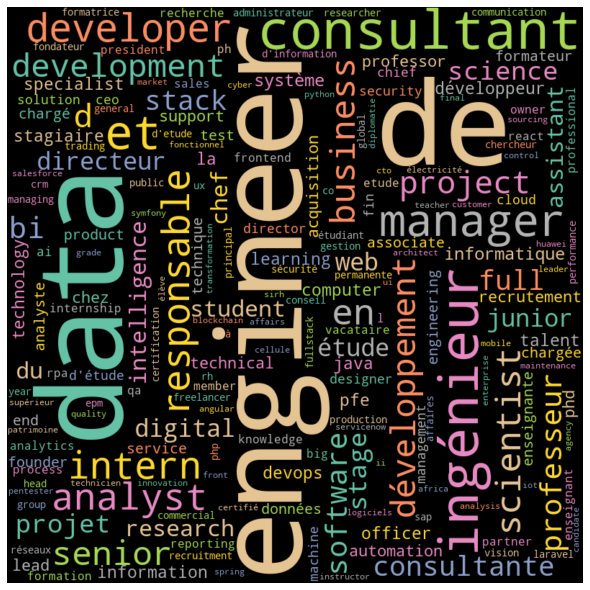

In [19]:
wordcloud = make_wordcloud(positions)